### PART 1 and 2

In [ ]:
#!pip install selenium
# !apt-get -q update # to update ubuntu to correctly run apt install
#!apt install -yq chromium-chromedriver
#!cp /usr/lib/chromium-browser/chromedriver /usr/bin

import sys
import pandas as pd
#sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver') #Ubuntu - Colab
sys.path.insert(0,'C:/Users/sebas/Downloads/chromedriver') #Windows - change user
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

In [ ]:
#driver = webdriver.Chrome('chromedriver', options=chrome_options) #Colab
driver = webdriver.Chrome(executable_path='C:/Users/sebas/Downloads/chromedriver', options=chrome_options)
#driver= webdriver.Chrome() #Windows + PATH

In [ ]:
comments = pd.DataFrame(columns = ['Date','user_id','comments']) 
for j in range(1860,1861): #Reduced Data - for test
#for j in range(1860,1961): #Actual Data
    p = driver.get('https://forums.edmunds.com/discussion/4011/general/x/chronic-car-buyers-anonymous/p' + str(j))
    print("page " + str(j) + " ready")


    ids = driver.find_elements_by_xpath("//*[contains(@id,'Comment_')]")
    comment_ids = []
    for i in ids:
        comment_ids.append(i.get_attribute('id'))
        
        
    for x in comment_ids:
        try:
            element = driver.find_elements_by_xpath('//*[@id="' + x +'"]/div/div[3]/div/div[1]/blockquote')[0]
            driver.execute_script("""
                var element = arguments[0];
                element.parentNode.removeChild(element);
                """, element)
        except:
            pass
        
    for x in comment_ids:
        #Extract dates from for each user on a page
        user_date = driver.find_elements_by_xpath('//*[@id="' + x +'"]/div/div[2]/div[2]/span[1]/a/time')[0]
        date = user_date.get_attribute('title')

        #Extract user ids from each user on a page
        userid_element = driver.find_elements_by_xpath('//*[@id="' + x +'"]/div/div[2]/div[1]/span[1]/a[2]')[0]
        userid = userid_element.text

        #Extract Message for each user on a page
        user_message = driver.find_elements_by_xpath('//*[@id="' + x +'"]/div/div[3]/div/div[1]')[0]
        comment = user_message.text

        #Adding date, userid and comment for each user in a dataframe    
        comments.loc[len(comments)] = [date,userid,comment]

In [ ]:
#Use if in colab

#from google.colab import drive
#drive.mount('/content/gdrive')

In [ ]:
comments.to_csv("results_recent_wo_BQ_lite.csv", sep="\t") #Dummy Data - For test
#comments.to_csv("results_recent_wo_BQ.csv", sep="\t") #Actual Data - Takes a While

### Part 3

In [1]:
import re
import nltk
from string import punctuation
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
import matplotlib.pyplot as plt
%pylab inline
import numpy as np
import pandas as pd
from collections import Counter

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\geogh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\geogh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\geogh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Populating the interactive namespace from numpy and matplotlib


In [2]:
raw = pd.read_csv("results_recent_wo_BQ.csv", sep="\t")
raw.drop(['Unnamed: 0'],axis=1,inplace=True)
print (raw.shape)
raw.head(10)

(5050, 3)


,Date,user_id,comments
0,"June 10, 2019 11:56PM",sda,Did he buy it at an Audi dealer? Are they tell...
1,"June 11, 2019 12:06AM",henryn,I'm surprised no one else has addressed this. ...
2,"June 11, 2019 12:46AM",roadburner,I loved my 1975.
3,"June 11, 2019 12:55AM",28firefighter,Not really looking to argue with you - he is a...
4,"June 11, 2019 1:20AM",qbrozen,"I agree with what you guys are saying, but, at..."
5,"June 11, 2019 1:31AM",Sandman6472,"So far, our 2015 A3 has been flawless. She own..."
6,"June 11, 2019 2:19AM",28firefighter,Punch for me. But it isn’t a car and doesn’t h...
7,"June 11, 2019 2:32AM",henryn,Not really looking to argue with you - he is a...
8,"June 11, 2019 2:45AM",pensfan83,Looks great @28firefighter
9,"June 11, 2019 2:49AM",28firefighter,Can you make out the second picture in? My fav...


In [3]:
# DATA CLEANSING

def remove_space(s):
    return s.replace("\n"," ")

def removepunc(item):
    for p in punctuation:
        item = item.lstrip().replace(p,'')
    return item

def lowerize(x):
    return x.lower()

stop_words = set(stopwords.words('english'))

def remove_stopwords(s):
    return [w for w in s if not w in stop_words] 

def lematize(l):
    s=[]
    for i in l:
        i=i.lower()
        if i in modeldict:
            s.append(modeldict[i])
        else:
            s.append(wordnet_lemmatizer.lemmatize(i))
    return s


In [4]:
models = pd.read_csv("models.csv")
data = raw.copy()
data = data.dropna()
#data['comments'] = data['comments'].apply(removepunc).apply(lowerize).apply(remove_stopwords)
data['comments'] = data['comments'].apply(remove_space).apply(removepunc).apply(lowerize)
data.head()

,Date,user_id,comments
0,"June 10, 2019 11:56PM",sda,did he buy it at an audi dealer are they telli...
1,"June 11, 2019 12:06AM",henryn,im surprised no one else has addressed this ba...
2,"June 11, 2019 12:46AM",roadburner,i loved my 1975
3,"June 11, 2019 12:55AM",28firefighter,not really looking to argue with you he is a ...
4,"June 11, 2019 1:20AM",qbrozen,i agree with what you guys are saying but at t...


In [5]:
models = models.set_index("Model")
data_dict = models.to_dict() # converting to dict
modeldict=data_dict["Brand"]

wordnet_lemmatizer = WordNetLemmatizer()

data['comments_word'] = data['comments'].apply(word_tokenize).apply(set).apply(list)

data['comments_replace_model'] = data['comments_word'].apply(lematize).apply(set)

data['comments_final_words'] =  data['comments_replace_model'].apply(remove_stopwords)

data.head()

,Date,user_id,comments,comments_word,comments_replace_model,comments_final_words
0,"June 10, 2019 11:56PM",sda,did he buy it at an audi dealer are they telli...,"[pound, take, he, dealer, him, did, to, tellin...","{pound, take, he, dealer, him, did, to, tellin...","[pound, take, dealer, telling, buy, sand, care..."
1,"June 11, 2019 12:06AM",henryn,im surprised no one else has addressed this ba...,"[failed, going, suspect, not, when, sensor, fr...","{failed, going, suspect, when, not, sensor, fr...","[failed, going, suspect, sensor, friend, ha, i..."
2,"June 11, 2019 12:46AM",roadburner,i loved my 1975,"[1975, my, i, loved]","{1975, i, my, loved}","[1975, loved]"
3,"June 11, 2019 12:55AM",28firefighter,not really looking to argue with you he is a ...,"[given, not, he, sensor, friend, intentionally...","{given, not, he, sensor, friend, intentionally...","[given, sensor, friend, intentionally, dealer,..."
4,"June 11, 2019 1:20AM",qbrozen,i agree with what you guys are saying but at t...,"[same, said, the, audi, guys, with, what, i, s...","{same, said, the, guy, audi, with, what, i, sa...","[said, guy, audi, saying, agree, time, nuff]"


In [6]:
data.reset_index(inplace  = True)

In [7]:
word_bag = []
for i in range(data.shape[0]):
    word_bag += data['comments_final_words'][i]

#word_bag

word_freq = nltk.FreqDist(word_bag)

In [8]:
rslt = pd.DataFrame(word_freq.most_common(500),              
                    columns=['Word', 'Frequency'])
rslt.head()

,Word,Frequency
0,car,1084
1,wa,1078
2,’,1050
3,like,962
4,one,891


### Task A

In [9]:
model_list = list(models["Brand"].drop_duplicates())
top_10_brands = rslt[rslt["Word"].isin(model_list)].reset_index(drop='True')[:10]
top_10_brands

,Word,Frequency
0,audi,236
1,volkswagen,226
2,honda,225
3,subaru,187
4,acura,175
5,toyota,173
6,chevrolet,166
7,volvo,163
8,bmw,140
9,hyundai,137


In [10]:
def check_co_occ(brand_A,brand_B,post):
    if(brand_A in post and brand_B in post):
        return 1;
    else:
        return 0;



In [11]:
comments = data['comments_final_words']


co_exist_num = {}
#model_list = list(models["Brand"].drop_duplicates())
model_list = list(top_10_brands['Word'])
for brand_A in model_list:
        for brand_B in model_list:
            co_exist_num[brand_A+","+brand_B] = 0



In [12]:
for comment in comments:
    for brand_A in model_list:
        for brand_B in model_list:
            co_exist_num[brand_A+","+brand_B]+=check_co_occ(brand_A,brand_B,comment)
        

In [13]:
mat = pd.DataFrame.from_dict(co_exist_num, orient = 'index').values.reshape(10,10)
df = pd.DataFrame(mat).set_index(pd.Series(top_10_brands['Word']))
df.columns = top_10_brands['Word']
df

Word,audi,volkswagen,honda,subaru,acura,toyota,chevrolet,volvo,bmw,hyundai
Word,,,,,,,,,,
audi,236,42,25,12,18,7,11,20,11,11
volkswagen,42,226,28,19,15,13,15,11,9,23
honda,25,28,225,18,29,28,11,16,11,15
subaru,12,19,18,187,16,11,3,16,12,9
acura,18,15,29,16,175,10,4,28,12,10
toyota,7,13,28,11,10,173,15,5,6,14
chevrolet,11,15,11,3,4,15,166,5,4,9
volvo,20,11,16,16,28,5,5,163,9,12
bmw,11,9,11,12,12,6,4,9,140,5


In [14]:
N=len(comments)
lift=df

for i in range(10):
    for j in range(10):
        lift.iloc[i,j]=N*df.iloc[i,j]/(top_10_brands['Frequency'].iloc[i]*top_10_brands['Frequency'].iloc[j])

lift_view = lift.copy()
for r in range(10):
    for c in range(10):
        if (r >= c):
            lift_view.iloc[r,c] = "-"
        else:
            lift_view.iloc[r,c] = lift.iloc[r,c]
            
lift_view

Word,audi,volkswagen,honda,subaru,acura,toyota,chevrolet,volvo,bmw,hyundai
Word,,,,,,,,,,
audi,-,3.95856,2.36676,1.3669,2.19094,0.861884,1.4115,2.6136,1.67364,1.71029
volkswagen,-,-,2.76806,2.26002,1.90657,1.67147,2.00994,1.50109,1.42993,3.73429
honda,-,-,-,2.15059,3.70243,3.61608,1.48051,2.1931,1.75546,2.44623
subaru,-,-,-,-,2.45782,1.70928,0.485826,2.63876,2.3042,1.76599
acura,-,-,-,-,-,1.66045,0.692186,4.93448,2.4622,2.09677
toyota,-,-,-,-,-,-,2.62571,0.891344,1.24533,2.96941
chevrolet,-,-,-,-,-,-,-,0.92893,0.865232,1.9894
volvo,-,-,-,-,-,-,-,-,1.9826,2.70136
bmw,-,-,-,-,-,-,-,-,-,1.31048


In [15]:
lift_diss=1/lift

for i in range(10):
    lift_diss.iloc[i,i]=0
lift_diss

lift_view = lift_diss.copy()
for r in range(10):
    for c in range(10):
        if (r >= c):
            lift_view.iloc[r,c] = "-"
        else:
            lift_view.iloc[r,c] = lift_diss.iloc[r,c]
            
lift_view

Word,audi,volkswagen,honda,subaru,acura,toyota,chevrolet,volvo,bmw,hyundai
Word,,,,,,,,,,
audi,-,0.252617,0.422518,0.731583,0.456424,1.16025,0.708465,0.382614,0.597501,0.584697
volkswagen,-,-,0.361263,0.442474,0.524501,0.598277,0.497527,0.666184,0.699335,0.267789
honda,-,-,-,0.464989,0.270093,0.276542,0.675444,0.455975,0.569651,0.408793
subaru,-,-,-,-,0.406865,0.585041,2.05835,0.378966,0.43399,0.566253
acura,-,-,-,-,-,0.602248,1.4447,0.202656,0.40614,0.476925
toyota,-,-,-,-,-,-,0.38085,1.1219,0.802997,0.336767
chevrolet,-,-,-,-,-,-,-,1.07651,1.15576,0.502663
volvo,-,-,-,-,-,-,-,-,0.504387,0.370184
bmw,-,-,-,-,-,-,-,-,-,0.763079


In [16]:
mat_lift=lift_diss.values
from sklearn import manifold
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import sklearn

MDS_cars = sklearn.manifold.MDS(n_components=2, metric=True, dissimilarity='precomputed')


dissimilarity = lift_diss
npos = MDS_cars.fit_transform(dissimilarity)

seed = np.random.RandomState(seed=99)
mds = manifold.MDS(n_components=2, max_iter=20000, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
x_mds= mds.fit(dissimilarity.astype(np.float32)).embedding_


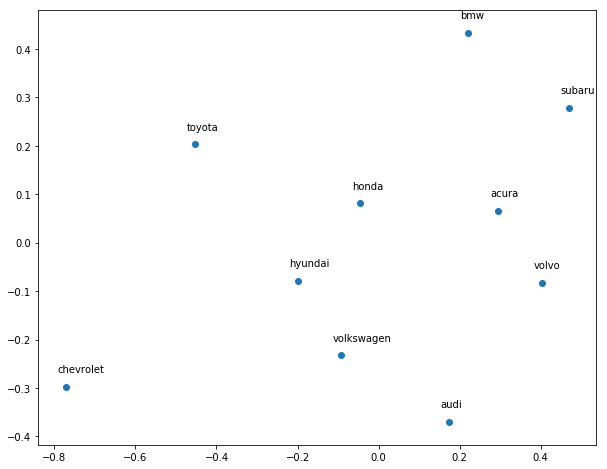

In [17]:
fig = plt.figure(figsize=(10, 8))
x=x_mds[:,0]
y=x_mds[:,1]

label=lift.columns.values
plt.scatter(x, y)
for i in range(10):
    plt.text(x[i]-0.02,y[i]+0.03,label[i])
plt.show()

### Task B

What insights can you offer brand managers from your analysis in Task A (choose two brands that you can offer the most interesting/useful insights for)? 

INSIGHTS:

The data is scraped from a car forum where the buyers are frequent buyers of cars. The assumption behind the following insights is that these buyers are comparing two brands in each post as part of their buying/switching decision.

##### BRAND 1: 
> Chevrolet

Chevrolet brand is pretty isolated on the MDS graph showing dissimilarity from all other brands. What this means for chevrolet as a brand is that it is not talked in association with other brands on a relative comparison to how other brands are talked about. This could mean as a positive sign of it not getting compared to other brands reflecting a loyal talking audience. However, it also goes to show that people interested in talking about other car brands do not involve chevrolet in their discussions as much. It can be inferred that people show low switching behaviour from chevrolet to other brands and vice-versa.

##### BRAND 2:
>Volvo

Volvo is very close to Acura on the MDS graph showing association in the discussion forum. What this means for the brand of Volvo is that it is constantly talked and/or compared with Acura. The brand manager should treat Acura's brand as a comparison parameter for its customers(or potential customers). It can be inferred that people when making a comment or taking a buying decision often compare Acura with Volvo more often than they do with other brands.

### Task C

#### First, define what words denote an attribute and map to brands

In [18]:
#Attributes are not defined - need to download words to create a dictionary of attribute terms.
words=[]
for i in data['comments_final_words']:
    words.append(i)

import itertools
merged_list = list(itertools.chain.from_iterable(words))

from collections import Counter
counts = Counter(merged_list)

#output words to be assessed
output = pd.DataFrame.from_dict(data=counts, orient='index')
#output.to_csv("attribute_singleword_frequency", sep='\t')

In [22]:
#import words tagged with attribute - 1,000+ words manually assessed to find top 5 attribute categories
attributes = pd.read_csv("attribute_lookup.csv", sep=',')

#show top 5 most frequently mentioned attributes
attributes.groupby(["Attribute"]).sum().sort_values(by=["Count"], ascending=False)

,Count
Attribute,
Interior,450
Performance,285
Engine,223
Body Style,199
Transmission,173


In [23]:
#Display words associated with attribute
attributes.groupby(["Attribute", "Word"]).sum().sort_values(by=["Attribute", "Count"], ascending=True)

Count
Attribute    Word               
Body Style   2seater           3
             coupe            13
             pickup           25
             sedan            36
             wagon            55
             suv              67
Engine       diesel           10
             v8               14
             cylinder         15
             hybrid           23
             v6               51
             engine          110
Interior     seatbelt          4
             backseat         10
             floor            22
             trim             38
             leather          42
             interior        159
             seat            175
Performance  zippy             4
             torque           20
             hp               31
             performance      36
             turbo            46
             speed            59
             power            89
Transmission automatic        28
             auto             36
             manual           53
             transmission     56

In [24]:
#define function to check brand mention and attribute key word mention in a post
def check_brand_att(att, brand, text):
    if(att in text and brand in text):
        return 1
    else:
        return 0

In [25]:
#create dictionary with counts of brand and attribute key word
brand_att_id = {}
attribute_id_list = list(attributes["Word"])
top_5_brands = list(top_10_brands["Word"][:5])
comments = data['comments_final_words']

for att in attribute_id_list:
        for brand in top_5_brands:
            brand_att_id[att+","+brand] = 0
            
for comment in comments:
    for att in attribute_id_list:
        for brand in top_5_brands:
            brand_att_id[att+","+brand] += check_brand_att(att, brand, comment)

In [26]:
#Create dataframe attribute key words vs brand counts
df_mat = pd.DataFrame.from_dict(brand_att_id, orient = 'index').values.reshape(len(attribute_id_list),5)
df_attributes = pd.DataFrame(df_mat).set_index(pd.Series(attribute_id_list))
df_attributes.columns = list(top_5_brands)
df_attributes.head()

,audi,volkswagen,honda,subaru,acura
seat,12,23,16,18,14
interior,23,30,17,12,16
engine,9,11,9,21,15
power,10,4,7,8,8
suv,5,6,5,4,3


#### Calculate lifts for long list of attribute keywords, delete any with low lift scores

In [27]:
#See long list of lifts to check whether to throw out key words
N=len(comments)
lift_att = df_attributes.copy()
top_5_brands = top_10_brands.iloc[:5]

for i in range(len(df_attributes)):
    for j in range(5):
        numerator = N*df_attributes.iloc[i,j]
        denominator = (top_10_brands['Frequency'].iloc[j] * attributes["Count"].iloc[i])
        lift_att.iloc[i,j] = numerator/denominator
lift_att

,audi,volkswagen,honda,subaru,acura
seat,1.460630,2.923413,2.042717,2.765042,2.298057
interior,3.081255,4.196861,2.388791,2.028857,2.890638
engine,1.742797,2.224336,1.828000,5.132086,3.917143
power,2.393354,0.999702,1.757253,2.416391,2.582087
suv,1.589615,1.991943,1.667330,1.604917,1.286226
speed,2.527219,2.262037,2.272090,1.822532,1.460630
wagon,2.323729,2.426549,1.624889,6.354011,4.700571
manual,1.205708,2.518117,2.529308,0.507214,4.335957
v6,1.670655,0.436144,4.818911,2.108420,6.195742
transmission,4.944840,2.780420,1.994841,0.960084,3.077755


In [29]:
#drop zippy and 2seater
mask = ((attributes["Word"] == "zippy") | (attributes["Word"] == "2seater") | 
        (attributes["Word"] == "seatbelt") | (attributes["Word"] == "v8"))
attributes = attributes[-mask]

#### Now go through all comments, replace attribute keyword with its attribute class and remove duplicates in each post

In [30]:
#function to replace keywords with attribute class
def att_class(x):
    for key, value in enumerate(x): 
        if value in attributes["Word"].values:
            mask = attributes["Word"]==value
            x[key] = str(attributes[mask]["Attribute"].values[0])
    return x

#function to just count att class
def check_att_class(att, text):
    if(att in text):
        return 1
    else:
        return 0

In [31]:
data['comments_final_words_atts'] =  data['comments_final_words'].apply(att_class)
data['comments_final_words_atts'] = data['comments_final_words_atts'].apply(set).apply(list)
comments_new = data['comments_final_words_atts']

In [32]:
brand_att_key_only = {}
attribute_id_list = list(set(attributes["Attribute"]))

for att in attribute_id_list:
        brand_att_key_only[att] = 0

for comment in comments_new:
    for att in attribute_id_list:
        brand_att_key_only[att] += check_att_class(att, comment)
brand_att_key_only = pd.DataFrame(list(brand_att_key_only.items()), columns=['Att', 'Count'])
brand_att_key_only

,Att,Count
0,Performance,240
1,Engine,194
2,Body Style,174
3,Transmission,152
4,Interior,357


In [33]:
#count occurences of brand and attribute class
brand_att_key = {}
attribute_id_list = list(set(attributes["Attribute"]))
top_5_brands = top_10_brands["Word"].iloc[:5]

for att in attribute_id_list:
        for brand in top_5_brands:
            brand_att_key[att+","+brand] = 0

for comment in comments_new:
    for att in attribute_id_list:
        for brand in top_5_brands:
            brand_att_key[att+","+brand] += check_brand_att(att, brand, comment)

In [34]:
#Create dataframe attribute key words vs brand counts
df_mat = pd.DataFrame.from_dict(brand_att_key, orient = 'index').values.reshape(len(attribute_id_list),5)
df_attributes = pd.DataFrame(df_mat).set_index(pd.Series(attribute_id_list))
df_attributes.columns = list(top_5_brands)
df_attributes

,audi,volkswagen,honda,subaru,acura
Performance,21,20,22,20,21
Engine,18,19,23,27,26
Body Style,13,14,18,17,17
Transmission,16,18,17,11,16
Interior,35,46,32,26,32


In [37]:
N=len(comments_new)
lift_att = df_attributes.copy()
top_5_brands = top_10_brands.iloc[:5]
att_class_counts = brand_att_key_only["Count"]

for i in range(len(att_class_counts)):
    for j in range(5):
        numerator = N*df_attributes.iloc[i,j]
        denominator = (top_5_brands['Frequency'].iloc[j] * att_class_counts.iloc[i])
        lift_att.iloc[i,j] = numerator/denominator
lift_att

,audi,volkswagen,honda,subaru,acura
Performance,1.863824,1.853614,2.048037,2.240196,2.513500
Engine,1.976367,2.178474,2.648820,3.741358,3.849838
Body Style,1.591443,1.789696,2.311264,2.626437,2.806535
Transmission,2.242194,2.634082,2.498801,1.945433,3.023759
Interior,2.088318,2.866092,2.002664,1.957818,2.574854


# Task D

#### Advice to Product Manager

Performance:
Performance is associated with all brands and is highest for Acura. These scores, and the detailed scores beneath them, provide direction for where product managers should focus their resources. For Acura, performance is an important attribute which is a data point to support continued investment in the underlying features. For all brands, performance is less important than multiple other attributes which suggests invetment in performance features should be tempered with equal or more invetment in other features.

Engine:
Engine has a broad range of lifts for each brand and is very high for Subaru and Acura. Reading some posts there appears to be strong positive and negative sentiment about this attribute. For example, Subaru has negative mentions about issues with wear-and-tear and resale value. Being aware of these issues could help improve future product lines.

Body Style:
The lift between Body Style (e.g. sedan, suv, coupe) and brands shows which body styles are associated with each brand. In particular it provides insight into which style resonates most with customers from a product line that may include multiple body styles. For example, Subaru and wagon have a very high lift from posts such as: 

"And as you say Subaru is like a more affordable version of a Volvo. Even ten years ago Subaru interiors were less than ideal but the 2020 Outback in the upper trims looks very good to me. I think even the top-of-the-line Outback with the turbo engine is less than the base model Volvo wagon"

The Outback product line is mentioned frequently when discussions about wagon occur. These insights are shown in detail in the longer lift table in Task C and can help with decisions about future product lines, where resources should be focused in development and how to price different body styles.  

Transmission:
Transmission (e.g. automatic or manual) is highest for Acura. The lifts for each brand can help inform whether manual and automatic options are important to customers. For example, Volkswagen has very high lift in relation to automatic but relatively low lift for manual. For Volkswagen it may make sense to only/ primarily offer automatic options.

Interior: 
The interior of cars were mentioned frequently and often mentioned distinct features. For what would be relatively low-cost additions (e.g. a distinct gear knob) and simple engineering, changes to interiors to make product lines distinctive could capture new customers and also a deep dive into the data could help identify what interior elements should be kept in future models.

#### Advice to Marketing/ Advertising Manager

Performance:
Interestingly performance isn't the highest lift score for any brand. While important, it may not warrant the attention that many marketing and advertising campaigns provide it. It should be considered as an equal or lesser attribute in marketing materials in parallel with other attributes.

Engine:
Posts about engines include many positive and negative posts. Being aware of the perception of this attribute can help reshape the conversation and either improve negative sentiment or grow positive sentiment. 

Body Style:
Different body styles are frequently mentioned when discussing brands. The lifts of different styles vs brands provides a data point to understand market awareness of different product lines/ body styles for a brand. If there is high association between a certain style and a brand, marketing could direct resources to cementing the brand as a leader of that body style (e.g. Subaru as a leader for wagons). Alternativley, it can identify where customers are not aware of body styles for brands, where more advertising and marketing can help improve awareness and make customers consider the brand in future purchasing decisions when a shopping for an SUV, sedan or other body style.

Transmission:
Transmission is a frequently discussed attribute in car forums and can be inferred as important for customers. Including a description of the car's transmission in marketing material and messaging could help provide the information desired by customers when making their purchasing decision.

Interior:
Interior has lifts of 2.0 - 2.9 for all brands and mostly comprises mentions of the words interior and seat. It appears that people strongly associate a car with specific features of the interior, for example in discussing the Volkswagen GTI a user mentioned "the GTI two distinct but simple textile elements: a tartan seat pattern and a golf ball-style gear knob". Interior elements can make cars distinctive and should therefore be highlighted in ads and marketing materials.

# Task E

In [38]:
raw = pd.read_csv("results_recent_wo_BQ.csv", sep="\t")
raw.drop(['Unnamed: 0'],axis=1,inplace=True)
print (raw.shape)
raw.head(10)

(5050, 3)


,Date,user_id,comments
0,"June 10, 2019 11:56PM",sda,Did he buy it at an Audi dealer? Are they tell...
1,"June 11, 2019 12:06AM",henryn,I'm surprised no one else has addressed this. ...
2,"June 11, 2019 12:46AM",roadburner,I loved my 1975.
3,"June 11, 2019 12:55AM",28firefighter,Not really looking to argue with you - he is a...
4,"June 11, 2019 1:20AM",qbrozen,"I agree with what you guys are saying, but, at..."
5,"June 11, 2019 1:31AM",Sandman6472,"So far, our 2015 A3 has been flawless. She own..."
6,"June 11, 2019 2:19AM",28firefighter,Punch for me. But it isn’t a car and doesn’t h...
7,"June 11, 2019 2:32AM",henryn,Not really looking to argue with you - he is a...
8,"June 11, 2019 2:45AM",pensfan83,Looks great @28firefighter
9,"June 11, 2019 2:49AM",28firefighter,Can you make out the second picture in? My fav...


In [39]:
# DATA CLEANSING

def remove_space(s):
    return s.replace("\n"," ")

def removepunc(item):
    for p in punctuation:
        item = item.lstrip().replace(p,'')
    return item

def lowerize(x):
    return x.lower()

stop_words = set(stopwords.words('english'))

def remove_stopwords(s):
    return [w for w in s if not w in stop_words] 

def lematize(l):
    s=[]
    for i in l:
        i=i.lower()
        if i in modeldict:
            s.append(modeldict[i])
        else:
            s.append(wordnet_lemmatizer.lemmatize(i))
    return s


In [40]:
models = pd.read_csv("models.csv")
data = raw.copy()
data = data.dropna()
#data['comments'] = data['comments'].apply(removepunc).apply(lowerize).apply(remove_stopwords)
data['comments'] = data['comments'].apply(remove_space).apply(removepunc).apply(lowerize)
data.head()

,Date,user_id,comments
0,"June 10, 2019 11:56PM",sda,did he buy it at an audi dealer are they telli...
1,"June 11, 2019 12:06AM",henryn,im surprised no one else has addressed this ba...
2,"June 11, 2019 12:46AM",roadburner,i loved my 1975
3,"June 11, 2019 12:55AM",28firefighter,not really looking to argue with you he is a ...
4,"June 11, 2019 1:20AM",qbrozen,i agree with what you guys are saying but at t...


In [41]:
models = models.set_index("Model")
data_dict = models.to_dict() # converting to dict
modeldict=data_dict["Brand"]

wordnet_lemmatizer = WordNetLemmatizer()

data['comments_word'] = data['comments'].apply(word_tokenize).apply(set).apply(list)

data['comments_replace_model'] = data['comments_word'].apply(lematize).apply(set)

data['comments_final_words'] =  data['comments_replace_model'].apply(remove_stopwords)

data['data_check'] = data['comments'].apply(word_tokenize).apply(list).apply(lematize)

data.head()

,Date,user_id,comments,comments_word,comments_replace_model,comments_final_words,data_check
0,"June 10, 2019 11:56PM",sda,did he buy it at an audi dealer are they telli...,"[pound, take, he, dealer, him, did, to, tellin...","{pound, take, he, dealer, him, did, to, tellin...","[pound, take, dealer, telling, buy, sand, care...","[did, he, buy, it, at, an, audi, dealer, are, ..."
1,"June 11, 2019 12:06AM",henryn,im surprised no one else has addressed this ba...,"[failed, going, suspect, not, when, sensor, fr...","{failed, going, suspect, when, not, sensor, fr...","[failed, going, suspect, sensor, friend, ha, i...","[im, surprised, no, one, else, ha, addressed, ..."
2,"June 11, 2019 12:46AM",roadburner,i loved my 1975,"[1975, my, i, loved]","{1975, i, my, loved}","[1975, loved]","[i, loved, my, 1975]"
3,"June 11, 2019 12:55AM",28firefighter,not really looking to argue with you he is a ...,"[given, not, he, sensor, friend, intentionally...","{given, not, he, sensor, friend, intentionally...","[given, sensor, friend, intentionally, dealer,...","[not, really, looking, to, argue, with, you, h..."
4,"June 11, 2019 1:20AM",qbrozen,i agree with what you guys are saying but at t...,"[same, said, the, audi, guys, with, what, i, s...","{same, said, the, guy, audi, with, what, i, sa...","[said, guy, audi, saying, agree, time, nuff]","[i, agree, with, what, you, guy, are, saying, ..."


In [42]:
ModelList = []
for i in range(0,len(models)):
    model =  models.iloc[i].values[0]
    if model in ModelList:
        model = ''
    elif model not in ModelList:
        ModelList.append(model)

In [43]:
def Ismodel(l):
    BoolRet = bool
    if ModelName in l:
        BoolRet = True
    else:
        BoolRet = False
        
    return BoolRet

global ModelName

for ModelName in ModelList:
    ModelString = ModelName + 'Set'
    ModelFrameName = data['comments_final_words'].map(Ismodel)
    
Cars = data[ModelFrameName]


In [44]:
CountDict = {}
AspList = ['want', 'wish', 'need', 'hope', 'expensive', 'pricey', 'aspire', 'aspirational', 'premium', 'luxury', 'future']

def ModelCheck(l):
    if Mdl in l:
        return True
    else:
        return False
    
def AspirationalCheck(l):
    returnvar = False
    for term in AspList:
        if term[0] in l:
            returnvar = True
        elif term not in l:
            continue
    return returnvar
    
    
global Mdl
for Mdl in ModelList:
    length = len(Cars[Cars['comments_final_words'].map(ModelCheck)])
    CountDict[Mdl] = length
    

ModelMentionDict = {}
for Mdl in ModelList:
    ModelSet = Cars[Cars['comments_final_words'].map(ModelCheck)]
    length = len(ModelSet[ModelSet['comments_final_words'].map(AspirationalCheck)])
    ModelMentionDict[Mdl] = [length]
    
ModelMentionDict

{'acura': [1],
 'audi': [1],
 'bmw': [0],
 'buick': [0],
 'cadillac': [0],
 'chevrolet': [0],
 'chrysler': [0],
 'dodge': [0],
 'ford': [0],
 'honda': [1],
 'hyundai': [0],
 'infiniti': [0],
 'kia': [0],
 'lincoln': [0],
 'mazda': [0],
 'mercedes': [0],
 'mercury': [0],
 'mitsubishi': [0],
 'nissan': [0],
 'pontiac': [0],
 'saturn': [0],
 'subaru': [0],
 'suzuki': [0],
 'toyota': [0],
 'volkswagen': [1],
 'volvo': [3]}

In [45]:
wordnet_lemmatizer = WordNetLemmatizer()

#Cars['real'] = Cars['data_check'].apply(word_tokenize).apply(list)

token = Cars['data_check']
allbigrams = []

for line in token:
    big = ngrams(line,2)
    for item in list(big):
        allbigrams.append(item)
    
aspwords = ['want', 'wish', 'need', 'hope', 'expensive', 'pricey', 'aspire', 'aspirational', 'premium', 'luxury', 'future']

    
def GetRelevantBigrams(word,listofbigrams):
    Set = []
        
    for bigram in listofbigrams:
        
        if word in bigram:
            
            Set.append(bigram)
            
    return Set


def GetNotOut(Lst):
    retlist = []
    for item in Lst:
        if ('not' not in item) and ("doesn't" not in item) and ("don't" not in item) and ("dont" not in item) and ("doesnt" not in item):
            retlist.append(item)
    return retlist


def BuildAspirationalDict(aspwords):
    AspirationalBigrams = [('want', 'to'), ('to', 'buy'), ("can't", "afford"), ('next', 'car'), ('one','day'), ('one', 'car')]
    
    BigramsinText = []
    for word in aspwords:

        listofbigrams = (GetRelevantBigrams(word,allbigrams))
    
        for bigram in listofbigrams:
        
#             BigramsinText.append(bigram)
    
#     CleanedBigrams = GetNotOut(BigramsinText)
        
#     for CleanBigram in CleanedBigrams:

            AspirationalBigrams.append(bigram)
            
    return AspirationalBigrams




AspirationDictionary = BuildAspirationalDict(aspwords)
print (token)

664     [much, against, my, better, judgement, ill, be...
683     [my, wife, might, like, the, passport, will, f...
704     [no, those, day, are, over, we, go, in, comple...
705     [nice, list, i, ’, m, sure, with, the, costco,...
706     [if, still, available, the, 3k, volvo, volvo, ...
707     [you, can, get, a, better, deal, on, a, loaner...
709     [iyou, can, get, a, better, deal, on, a, loane...
716     [yeah, it, pretty, good, i, calculated, it, to...
728     [so, here, is, my, initial, list, of, car, to,...
828     [i, shouldnt, be, shopping, yet, but, this, is...
830     [it, go, back, november, 7th, so, thats, 4, pa...
832     [tjc78, said, edit, it, due, back, nov, 7th, s...
833     [that, a, real, offer, or, volvo, ad, one, i, ...
834     [worth, exploring, for, sure, tjc78, im, sure,...
840     [yes, sound, like, how, i, bought, buick, 2, f...
841     [it, only, a, few, month, either, way, and, th...
843     [they, just, started, throwing, incentive, on,...
845     [i, li

In [46]:
def GetAspMentions(MdlDict, AspSet, aspwords , data):
    ModelandAspiration = False
    ModelsandAspsDict = {}
    TotAspir = 0
    specialbigram = ''
    for keys in MdlDict:
        ModelsandAspsDict[keys] = [0,0]

    for i in range(0,len(data)):
        wordlist = data.iloc[i][['data_check']][0]
        wordlistgrams = list(ngrams(wordlist,2))

            
#         for word in wordlist:
            
#             if word in aspwords:
                
#                 TotAspir +=1
                
        for bigram in wordlistgrams:

            if bigram in AspSet:

                TotAspir +=1
                
              
        for keys in MdlDict:
            
            if keys in wordlist:
                
                ModelsandAspsDict[keys][0] +=1

                for bigram in wordlistgrams:
                    
                    
                    ModelandAspiration = False
                    
                    if bigram in AspSet: 
                            
                        ModelandAspiration = True
                                
                    if ModelandAspiration == True:
                        
                        ModelsandAspsDict[keys][1] +=1
                        
                        
#                 for word in wordlist:
                    
#                     if word in aspwords:

#                         if keys in wordlist:
                            
#                             ModelsandAspsDict[keys][1] +=1

  
    return ModelsandAspsDict, TotAspir

aspwords = ['want', 'wish', 'need', 'hope', 'expensive', 'pricey', 'aspire', 'aspirational', 'premium', 'luxury', 'future']

CoMentionsDict, TotAspir = GetAspMentions(ModelMentionDict, AspirationDictionary, aspwords, data)




In [47]:
print (CoMentionsDict, TotAspir)
print (len(data))

{'acura': [175, 101], 'audi': [236, 97], 'bmw': [140, 56], 'buick': [65, 27], 'cadillac': [18, 10], 'chevrolet': [166, 61], 'chrysler': [19, 1], 'dodge': [72, 30], 'ford': [103, 40], 'honda': [225, 116], 'hyundai': [137, 79], 'infiniti': [70, 28], 'kia': [39, 22], 'lincoln': [12, 4], 'mazda': [34, 7], 'mercedes': [16, 7], 'mercury': [1, 0], 'mitsubishi': [7, 1], 'nissan': [99, 29], 'pontiac': [18, 3], 'saturn': [1, 0], 'subaru': [187, 61], 'suzuki': [6, 0], 'toyota': [173, 75], 'volkswagen': [226, 89], 'volvo': [163, 123]} 1184
5027


In [48]:
def CalcLift(ComentionsDict, data, TotAspir):
    ModelsWithLift = {}
    tot = len(data)
    B = TotAspir
    for keys in ComentionsDict:
        AB = ComentionsDict[keys][1]
        A = ComentionsDict[keys][0]
        Lift = (tot*AB)/(A*B)
        ModelsWithLift[keys] = round(Lift,2)
        
    return ModelsWithLift
        
        
        
        
LiftDict = CalcLift(CoMentionsDict, data, TotAspir)
LiftDict

{'acura': 2.45,
 'audi': 1.75,
 'bmw': 1.7,
 'buick': 1.76,
 'cadillac': 2.36,
 'chevrolet': 1.56,
 'chrysler': 0.22,
 'dodge': 1.77,
 'ford': 1.65,
 'honda': 2.19,
 'hyundai': 2.45,
 'infiniti': 1.7,
 'kia': 2.4,
 'lincoln': 1.42,
 'mazda': 0.87,
 'mercedes': 1.86,
 'mercury': 0.0,
 'mitsubishi': 0.61,
 'nissan': 1.24,
 'pontiac': 0.71,
 'saturn': 0.0,
 'subaru': 1.38,
 'suzuki': 0.0,
 'toyota': 1.84,
 'volkswagen': 1.67,
 'volvo': 3.2}

The above analysis was completed by finding keywords that suggest aspiration for owning a car by specific brands. These keywords were used to create bigrams to understand words on either side of the aspirational words and, where aspirational words were found with negating words before or after (e.g. remove (don't hope) and remove (don't want)). The analysis then followed a similar approach to above where the code finds comments with brand and aspirational language and counts either 1 coexists or 0 does not coexist per post. 

The lift scores above have significant implications for brands. 

Volvo has the highest lift score, which is evidence to support that Volvo's products and marketing are well received by customers, with data to suggest people aspire to own a brand. Ultimatley, this should translate to higher profits given the positive branding.

Luxury brands such as BMW, Mercedes and Audi would want/ expect to see relatively high lift scores here as they are priced at a premium and are positioned in marketing as an aspirational vehicle. The data does not support this position and suggests people are not aspiring to own these cars more so than other non-premium cars such as Hondas or Hyundais. Without people aspiring to own brands, the premium price point may be hard to defend in future years.

Some mid-tier brands have relatively high lift scores such as Kia, Honda or Hyundai. Similar to Volvo, the business should seek to continue with product elements and marketing that position them as aspirational. Being an aspriational brand could justify increased pricing of future lines or an ability to sell additional quantities. 

Brands with low lifts should be concerned (e.g. Saturn, Chrysler). Low lift scores show evidence that people do not aspire to own these cars. Shifting product lines/ features and changing marketing may help shift public perception of these brands and drive additional sales.  

Note, as discussed in class, without sentiment analysis these results may be skewed based on the methodology, e.g. people may aspire to get rid of their Volvos.  